In [30]:
"""
Created on Sun Dec 1 13:45:20 2018
@author: Ross Halpin
@requirements:
    Contrastive  https://github.com/abidlabs/contrastive
    Seaborn      https://seaborn.pydata.org/installing.html
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from contrastive import CPCA
import seaborn as sns;

dimensions = 2
data = pd.read_csv('train.txt', sep=' ', header=None) # pandas used as it automatically parses scientific notation
Xy = data.loc[:,1:].values

classification_One = Xy[Xy[:,8] == 1, :8] # all points labeled 1
classification_Zero = Xy[Xy[:,8] == 0, :8] # all points labeled 0

mdl = CPCA(n_components= dimensions)

# Data set contrasted with Class 1 auto plot
cPCA_plt = mdl.fit_transform(Xy[:,:8], classification_One, plot=True, alpha_selection='manual', alpha_value=12, active_labels=Xy[:,8])
# Data set contrasted with Class 1
A = mdl.fit_transform(Xy[:,:8], classification_One, alpha_selection='manual', alpha_value=12, active_labels=Xy[:,8])
# Class 0 contrasted with Class 1
zeros = mdl.fit_transform(classification_Zero, classification_One, alpha_selection='manual', alpha_value=12)
# Class 1 contrasted with Class 0
ones = mdl.fit_transform(classification_One, classification_Zero, alpha_selection='manual', alpha_value=12)
# Class 1 contrasted with Class 1
one_v_one = mdl.fit_transform(classification_One, classification_One, alpha_selection='manual', alpha_value=12)

fig1, ax1 = plt.subplots(1, 1)
ax1.set_title('Data vs Class 1')
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(A[:,0], A[:,1], c=Xy[:,8], cmap=plt.cool(),s=0.4)

fig2, ax2 = plt.subplots(1, 1)
ax2.set_title('Class 0 v 1 Histogram')
plt.xlabel('X')
plt.ylabel('Y')
plt.plasma()
plt.hist2d(zeros[:,0], zeros[:,1], bins=55)

fig3, ax3 = plt.subplots(1, 1)
ax3.set_title('Class 1 v 0 Histogram')
plt.xlabel('X')
plt.ylabel('Y')
plt.plasma()
plt.hist2d(ones[:,0], ones[:,1], bins=55)

fig4, ax4 = plt.subplots(1, 1)
ax4.set_title('Class 0 v 0 Histogram')
plt.xlabel('X')
plt.ylabel('Y')
plt.plasma()
plt.hist2d(one_v_one[:,0], one_v_one[:,1], bins=55)

fig5, ax5 = plt.subplots(1, 1)
ax5.set_title('Class 0 Kernel Density Estimation')
plt.xlabel('X')
plt.ylabel('Y')
sns.kdeplot(zeros[:,0],zeros[:,1],shade=True,cmap="Blues")

plt.show()

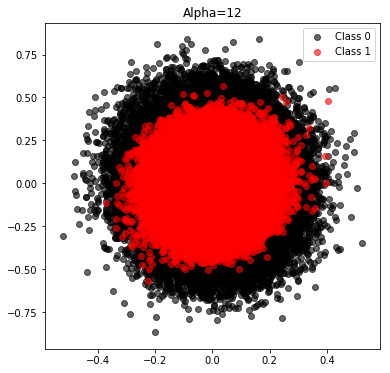

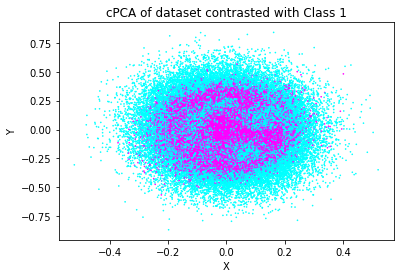

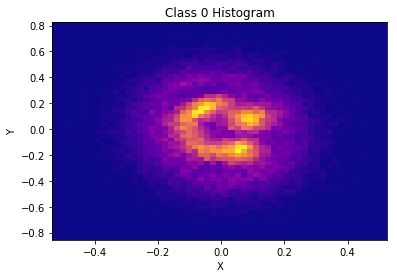

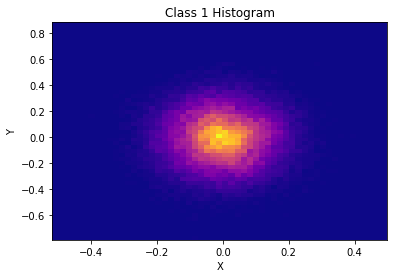

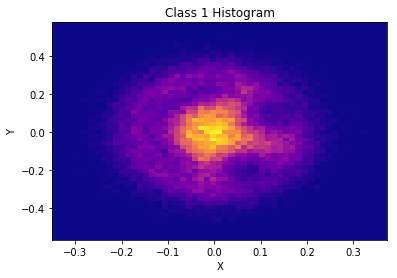

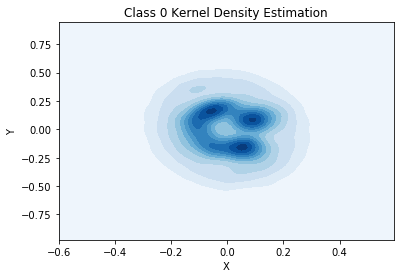